<a href="https://colab.research.google.com/github/Ridhi655/Linear-regression-model/blob/main/Brain_vs_Body_Weight_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.shape

(62, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
df=df.drop_duplicates()
df.shape

(62, 2)

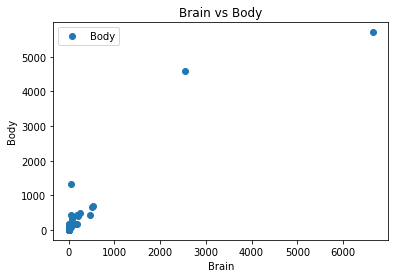

In [ ]:
df.plot(x='Brain',y='Body',style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

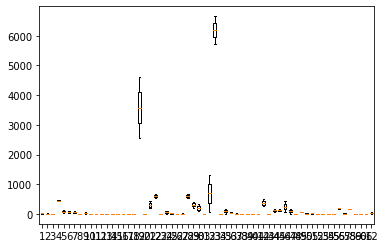

<Figure size 720x504 with 0 Axes>

In [ ]:
plt.boxplot(df)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df, 0.75)
med = np.median(df)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

97.2625 244.54375000000002 -144.50625000000002


In [ ]:

outliers = df[(df <= lower_bound) | (df >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:    Brain   Body
0     NaN    NaN
1     NaN    NaN
2     NaN    NaN
3   465.0  423.0
4     NaN    NaN
..    ...    ...
57    NaN    NaN
58    NaN    NaN
59    NaN    NaN
60    NaN    NaN
61    NaN    NaN

[62 rows x 2 columns]


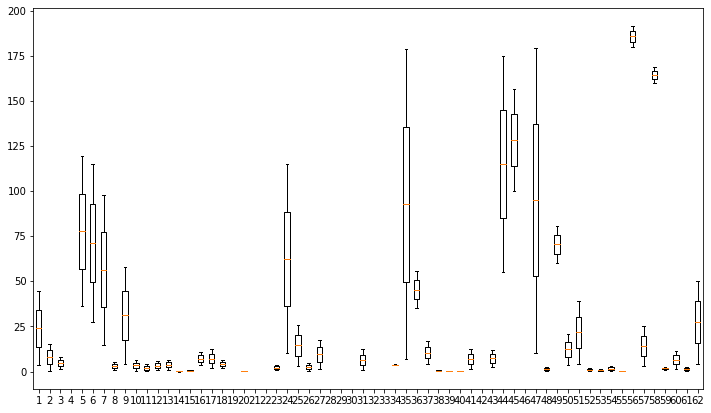

In [ ]:

# boxplot of data within the whisker
df_new =df[(df >= lower_bound) & (df <= upper_bound)] 
plt.figure(figsize=(12, 7))
plt.boxplot(df_new)
plt.show()

In [ ]:
df_new.shape

(62, 2)

In [ ]:

x=df.loc[:,['Brain']].values
y=df.loc[:,'Body'].values


In [ ]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [ ]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 91.00439620740687
coefficient: [0.96649637]


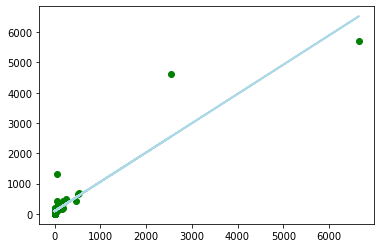

In [ ]:
plt.scatter(x, y, color='green')
plt.plot(x, linreg.predict(x), color='lightblue', linewidth=2)

In [ ]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.8726620843043331
